In [11]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

print('Done importing')

Done importing


In [2]:
X_train = np.load('train_images_singleImages.npy')
y_train = np.load('train_labels_singleImages.npy')
X_test = np.load('test_images_singleImages.npy')
y_test = np.load('test_labels_singleImages.npy')

In [3]:
print('Flattening training data set')
flattened_data_X_train = X_train.reshape(-1, np.prod(X_train.shape[1:]))
print(flattened_data_X_train.shape)
print('Done Flattening Training Data')

print('Flattening testing data set')
flattened_data_X_test = X_test.reshape(-1, np.prod(X_test.shape[1:]))
print(flattened_data_X_test.shape)
print('Done Flattening Training Data')

Flattening training data set
(68095, 3072)
Done Flattening Training Data
Flattening testing data set
(23542, 3072)
Done Flattening Training Data


In [4]:
print('Initializing SVM Classifier')
svm_classifier = svm.SVC(kernel='poly', degree=8)
print('Done initializing SVM Classifier')

Initializing SVM Classifier
Done initializing SVM Classifier


In [5]:
print('Training SVM Classifier...')
svm_classifier.fit(flattened_data_X_train, y_train)
print('Done Training SVM Classifier')

Training SVM Classifier...
Done Training SVM Classifier


In [6]:
y_train_pred = svm_classifier.predict(flattened_data_X_train)
y_pred = svm_classifier.predict(flattened_data_X_test)
print('Done predicting labels')

Done predicting labels


In [7]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9891915705998972
Test Accuracy: 0.7547786933990315


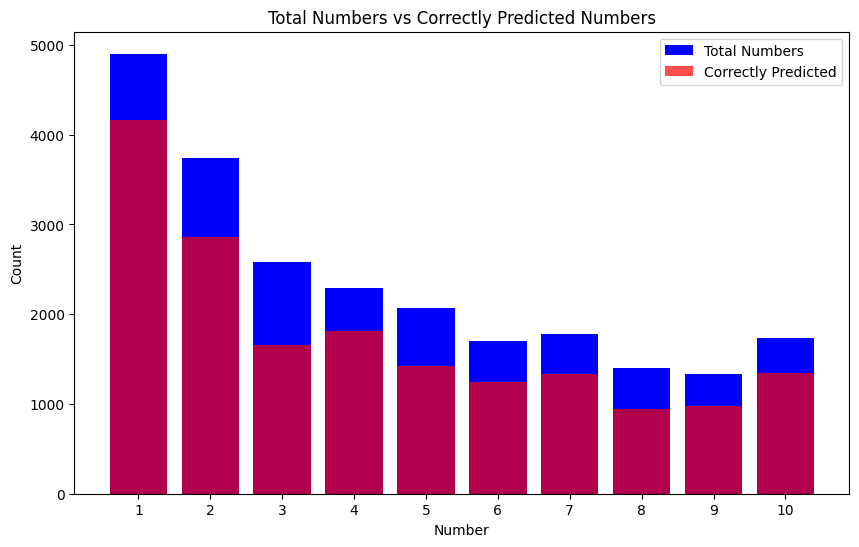

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.85      0.78      4903
           2       0.89      0.76      0.82      3745
           3       0.76      0.64      0.70      2582
           4       0.80      0.79      0.80      2289
           5       0.81      0.69      0.74      2073
           6       0.69      0.74      0.71      1699
           7       0.76      0.75      0.76      1777
           8       0.68      0.68      0.68      1402
           9       0.61      0.73      0.66      1339
          10       0.76      0.77      0.77      1733

    accuracy                           0.75     23542
   macro avg       0.75      0.74      0.74     23542
weighted avg       0.76      0.75      0.76     23542



In [12]:
unique_classes, true_counts = np.unique(y_test, return_counts=True)

correct_counts = np.zeros_like(true_counts)
for i, class_ in enumerate(unique_classes):
    correct_counts[i] = np.sum(y_pred[y_test == class_] == class_)

plt.figure(figsize=(10, 6))
plt.bar(unique_classes, true_counts, color='blue', label='Total Numbers')
plt.bar(unique_classes, correct_counts, color='red', label='Correctly Predicted', alpha=0.7)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Total Numbers vs Correctly Predicted Numbers')
plt.xticks(unique_classes)
plt.legend()
plt.show()

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Misclassified Samples:


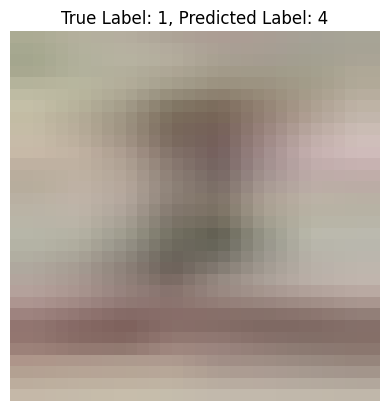

In [16]:
# Find misclassified samples (for analytics), made shorter for printing purposes
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

print("Misclassified Samples:")
for i in range(1): # change range accordingly
    plt.imshow(misclassified_samples[i], cmap='gray')
    plt.title(f'True Label: {true_labels[i]}, Predicted Label: {predicted_labels[i]}')
    plt.axis('off')
    plt.show()

Correctly Classified Samples:


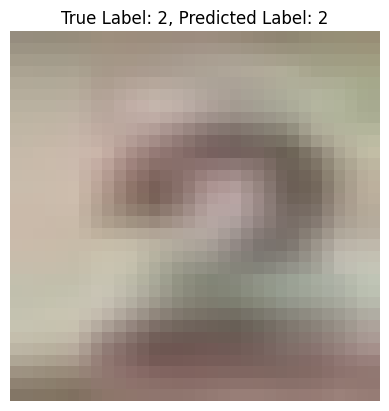

In [17]:
# Get correctly classified samples, made shorter for printing purposes
print("Correctly Classified Samples:")
correct_count = 0
for i in range(len(X_test)):
    if correct_count == 1: # change int accordingly
        break
    if y_pred[i] == y_test[i]:
        plt.imshow(X_test[i], cmap='gray')
        plt.title(f'True Label: {y_test[i]}, Predicted Label: {y_pred[i]}')
        plt.axis('off')
        plt.show()
        correct_count += 1